In [3]:
import cv2 as cv
import os
import mediapipe as mp
import numpy as np

from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates

import matplotlib.pyplot as plt


In [4]:
model_path = 'models/pose_landmarker_lite.task'
video_path = 'TestTrack002.mp4'

In [5]:
# Open the video file
video = cv.VideoCapture(video_path)

# Get the frames per second (fps)
fps = video.get(cv.CAP_PROP_FPS)

# Release the video file
video.release()

In [6]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5337755084037781, y=0.35872751474380493, z=-0.24279315769672394, visibility=0.9981896281242371, presence=0.99489825963974), NormalizedLandmark(x=0.5320447087287903, y=0.32845568656921387, z=-0.24854542315006256, visibility=0.9980660080909729, presence=0.9956369996070862), NormalizedLandmark(x=0.5353030562400818, y=0.32295098900794983, z=-0.24864767491817474, visibility=0.9983012676239014, presence=0.9961403012275696), NormalizedLandmark(x=0.5386155843734741, y=0.31731879711151123, z=-0.24872255325317383, visibility=0.9983945488929749, presence=0.9962980151176453), NormalizedLandmark(x=0.5243995785713196, y=0.33941450715065, z=-0.23368194699287415, visibility=0.9967958331108093, presence=0.9946908354759216), NormalizedLandmark(x=0.5218915343284607, y=0.3418600559234619, z=-0.23387034237384796, visibility=0.9961485862731934, presence=0.9944825172424316), NormalizedLandmark(x=0.5226455926895142, y=0.3459263741970062, z=-0.234010

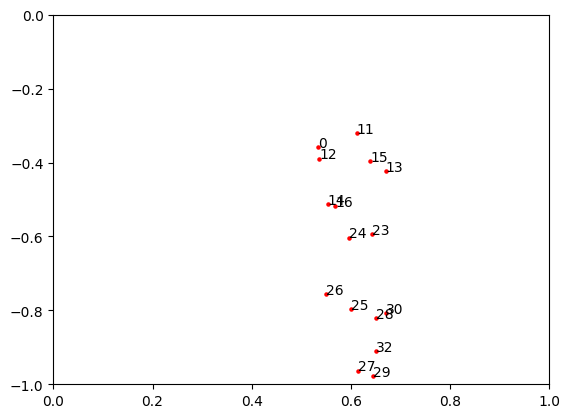

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5338558554649353, y=0.3595811426639557, z=-0.3001757264137268, visibility=0.9983240365982056, presence=0.9987910389900208), NormalizedLandmark(x=0.5320611000061035, y=0.3288222849369049, z=-0.30436915159225464, visibility=0.9981514811515808, presence=0.9984551668167114), NormalizedLandmark(x=0.5353137850761414, y=0.32317566871643066, z=-0.3044724762439728, visibility=0.9983733892440796, presence=0.998571515083313), NormalizedLandmark(x=0.5386220812797546, y=0.317438542842865, z=-0.30450257658958435, visibility=0.9984599351882935, presence=0.9986101388931274), NormalizedLandmark(x=0.5246531367301941, y=0.3424026668071747, z=-0.2899578809738159, visibility=0.9969625473022461, presence=0.998050332069397), NormalizedLandmark(x=0.5221433639526367, y=0.3449637293815613, z=-0.2900991439819336, visibility=0.9963697791099548, presence=0.9978860020637512), NormalizedLandmark(x=0.5225740671157837, y=0.3475455939769745, z=-0.290128231048

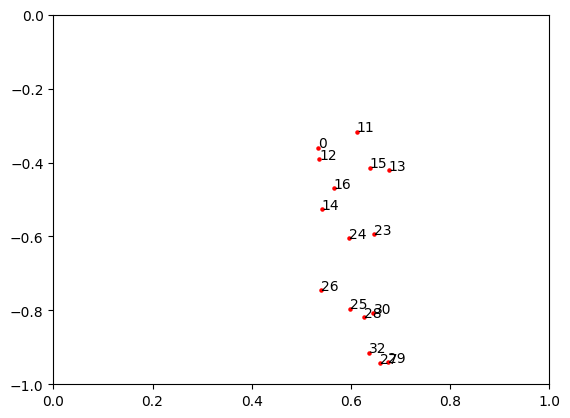

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5337485671043396, y=0.3597399890422821, z=-0.3009205758571625, visibility=0.9983842372894287, presence=0.9985053539276123), NormalizedLandmark(x=0.5318866968154907, y=0.3297732174396515, z=-0.3067069947719574, visibility=0.9981406331062317, presence=0.9984357953071594), NormalizedLandmark(x=0.5350309014320374, y=0.3242279887199402, z=-0.30681315064430237, visibility=0.9983549118041992, presence=0.9986017346382141), NormalizedLandmark(x=0.5382311344146729, y=0.3181844651699066, z=-0.3068496584892273, visibility=0.9984446167945862, presence=0.9986802935600281), NormalizedLandmark(x=0.5245875120162964, y=0.34279313683509827, z=-0.2911715805530548, visibility=0.996970534324646, presence=0.9979744553565979), NormalizedLandmark(x=0.5221110582351685, y=0.3451942801475525, z=-0.2913084328174591, visibility=0.9964187741279602, presence=0.9978320002555847), NormalizedLandmark(x=0.522485613822937, y=0.3476329445838928, z=-0.291331589221

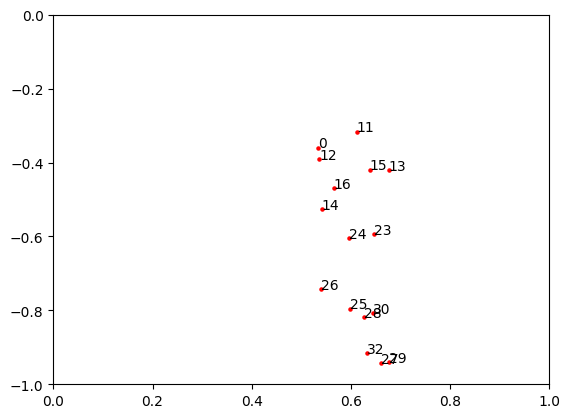

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5337540507316589, y=0.36000606417655945, z=-0.3206041753292084, visibility=0.9984126687049866, presence=0.9976115226745605), NormalizedLandmark(x=0.5318964719772339, y=0.330466628074646, z=-0.3285834491252899, visibility=0.9981516599655151, presence=0.9980728626251221), NormalizedLandmark(x=0.5350334644317627, y=0.32496321201324463, z=-0.32872676849365234, visibility=0.9983669519424438, presence=0.9984174966812134), NormalizedLandmark(x=0.5382460951805115, y=0.31882205605506897, z=-0.3287920355796814, visibility=0.9984556436538696, presence=0.99861741065979), NormalizedLandmark(x=0.5246083736419678, y=0.34321045875549316, z=-0.3130761384963989, visibility=0.9970060586929321, presence=0.9970904588699341), NormalizedLandmark(x=0.5221356749534607, y=0.34541475772857666, z=-0.3131920397281647, visibility=0.9964881539344788, presence=0.9967286586761475), NormalizedLandmark(x=0.5224855542182922, y=0.3477349877357483, z=-0.313178956

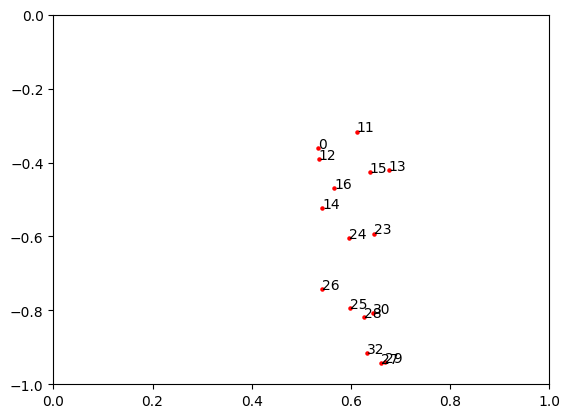

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5337539911270142, y=0.36005982756614685, z=-0.32685649394989014, visibility=0.9984208345413208, presence=0.9964483976364136), NormalizedLandmark(x=0.5319163799285889, y=0.33088505268096924, z=-0.33637484908103943, visibility=0.9981347322463989, presence=0.9970953464508057), NormalizedLandmark(x=0.5350444316864014, y=0.3254517912864685, z=-0.33653706312179565, visibility=0.99835205078125, presence=0.9976117610931396), NormalizedLandmark(x=0.5382766723632812, y=0.3192824423313141, z=-0.3366222679615021, visibility=0.9984487891197205, presence=0.9979283809661865), NormalizedLandmark(x=0.5246164798736572, y=0.34331539273262024, z=-0.3200708329677582, visibility=0.996993899345398, presence=0.9957084655761719), NormalizedLandmark(x=0.5221478939056396, y=0.34544795751571655, z=-0.32017576694488525, visibility=0.9965008497238159, presence=0.9952360987663269), NormalizedLandmark(x=0.5224809050559998, y=0.3477347493171692, z=-0.3201526

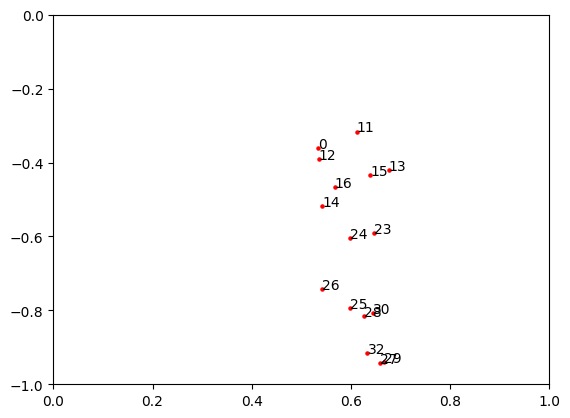

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5338096022605896, y=0.36006224155426025, z=-0.32234615087509155, visibility=0.9982494115829468, presence=0.9939659237861633), NormalizedLandmark(x=0.5319629907608032, y=0.3311547338962555, z=-0.33144819736480713, visibility=0.9978860020637512, presence=0.9943636655807495), NormalizedLandmark(x=0.5351400971412659, y=0.32568076252937317, z=-0.3316039443016052, visibility=0.9981111884117126, presence=0.9951238036155701), NormalizedLandmark(x=0.5383316278457642, y=0.3195730745792389, z=-0.33168962597846985, visibility=0.9982424974441528, presence=0.9955947995185852), NormalizedLandmark(x=0.5247070789337158, y=0.3433440327644348, z=-0.31524357199668884, visibility=0.9966562986373901, presence=0.9925205707550049), NormalizedLandmark(x=0.5222598314285278, y=0.3454503118991852, z=-0.3153558373451233, visibility=0.9961666464805603, presence=0.9919196367263794), NormalizedLandmark(x=0.5224899649620056, y=0.3477344810962677, z=-0.315348

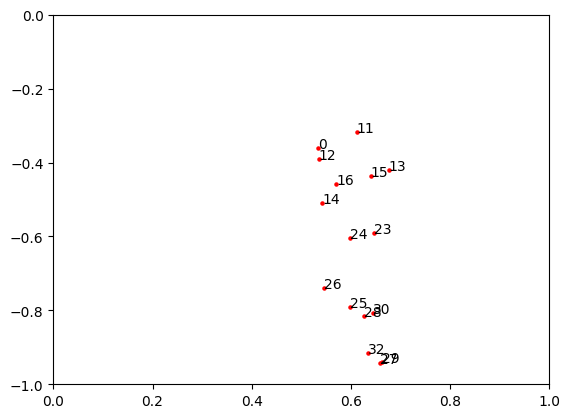

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5338900685310364, y=0.3600701689720154, z=-0.3316299617290497, visibility=0.9982644319534302, presence=0.9964694976806641), NormalizedLandmark(x=0.5320435762405396, y=0.33140021562576294, z=-0.34086570143699646, visibility=0.9978657364845276, presence=0.9965274930000305), NormalizedLandmark(x=0.5353070497512817, y=0.32589274644851685, z=-0.3410291373729706, visibility=0.9980883598327637, presence=0.9970032572746277), NormalizedLandmark(x=0.5384695529937744, y=0.3198280930519104, z=-0.34112754464149475, visibility=0.9982191920280457, presence=0.9972678422927856), NormalizedLandmark(x=0.5247589349746704, y=0.34339991211891174, z=-0.32417958974838257, visibility=0.9966514110565186, presence=0.9952948689460754), NormalizedLandmark(x=0.5223347544670105, y=0.3454652428627014, z=-0.3242923617362976, visibility=0.9961819052696228, presence=0.994939923286438), NormalizedLandmark(x=0.522506594657898, y=0.347734272480011, z=-0.324286490

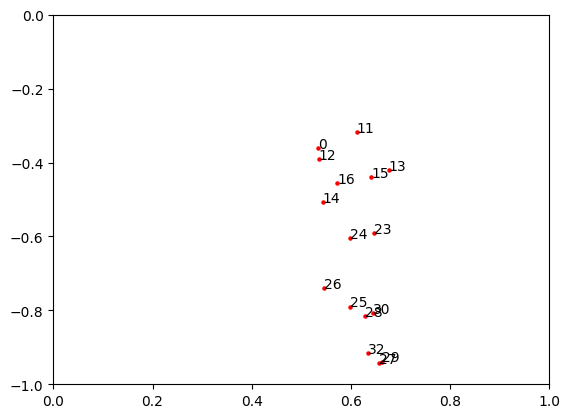

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5339542627334595, y=0.3599661588668823, z=-0.3268800973892212, visibility=0.9982038140296936, presence=0.9970120191574097), NormalizedLandmark(x=0.5321744680404663, y=0.33132389187812805, z=-0.3358262777328491, visibility=0.9977304339408875, presence=0.9966199398040771), NormalizedLandmark(x=0.5353967547416687, y=0.3258560597896576, z=-0.3359818756580353, visibility=0.9979633092880249, presence=0.9969430565834045), NormalizedLandmark(x=0.538518488407135, y=0.31981706619262695, z=-0.3360787332057953, visibility=0.9980989694595337, presence=0.9970856308937073), NormalizedLandmark(x=0.5248838067054749, y=0.3431667685508728, z=-0.3190658688545227, visibility=0.9964445233345032, presence=0.9958038926124573), NormalizedLandmark(x=0.5225079655647278, y=0.3451409339904785, z=-0.3191865384578705, visibility=0.9959798455238342, presence=0.9956282377243042), NormalizedLandmark(x=0.5225476622581482, y=0.34735792875289917, z=-0.3191961348

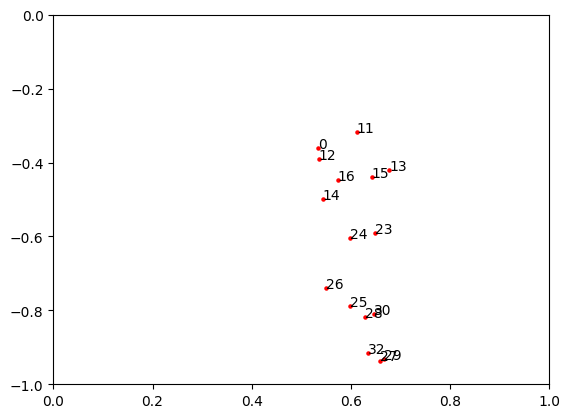

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5340605974197388, y=0.3590356707572937, z=-0.3224559426307678, visibility=0.9981308579444885, presence=0.9977400302886963), NormalizedLandmark(x=0.53229820728302, y=0.33083096146583557, z=-0.33100441098213196, visibility=0.9975226521492004, presence=0.9972182512283325), NormalizedLandmark(x=0.5354617238044739, y=0.32552430033683777, z=-0.3311536908149719, visibility=0.9977537393569946, presence=0.9975047707557678), NormalizedLandmark(x=0.5386142730712891, y=0.3195144832134247, z=-0.3312471807003021, visibility=0.9978641271591187, presence=0.9976494908332825), NormalizedLandmark(x=0.5251064896583557, y=0.34211260080337524, z=-0.3145104944705963, visibility=0.996200680732727, presence=0.9966391324996948), NormalizedLandmark(x=0.5228409767150879, y=0.3438425660133362, z=-0.31463780999183655, visibility=0.9957491159439087, presence=0.9965075850486755), NormalizedLandmark(x=0.5228022336959839, y=0.34571292996406555, z=-0.314660727

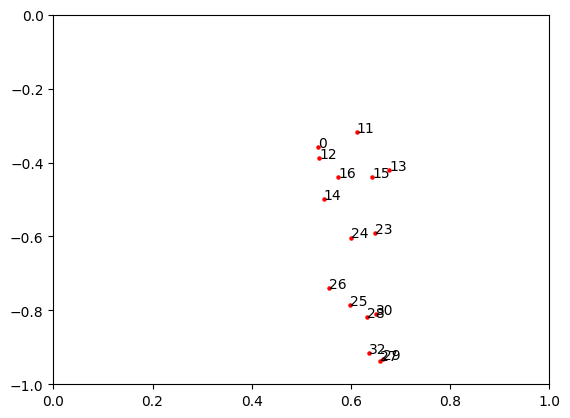

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5352136492729187, y=0.3555421829223633, z=-0.31752532720565796, visibility=0.998116672039032, presence=0.9980599284172058), NormalizedLandmark(x=0.5332409143447876, y=0.3286861479282379, z=-0.3251459300518036, visibility=0.9974048137664795, presence=0.997780978679657), NormalizedLandmark(x=0.5364894270896912, y=0.32338741421699524, z=-0.3252808153629303, visibility=0.997610330581665, presence=0.9979902505874634), NormalizedLandmark(x=0.5394384264945984, y=0.31758978962898254, z=-0.32536935806274414, visibility=0.9977126717567444, presence=0.9981038570404053), NormalizedLandmark(x=0.5265198349952698, y=0.3387864828109741, z=-0.308621346950531, visibility=0.9961014986038208, presence=0.9972808361053467), NormalizedLandmark(x=0.524176299571991, y=0.34034523367881775, z=-0.3087548315525055, visibility=0.9956555962562561, presence=0.997088611125946), NormalizedLandmark(x=0.5238597393035889, y=0.34159281849861145, z=-0.308784037828

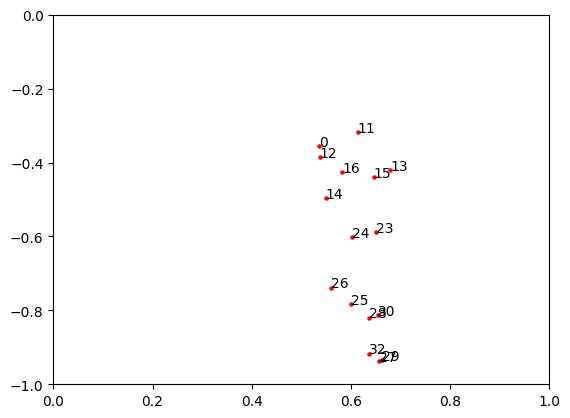

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5363996624946594, y=0.35219675302505493, z=-0.3153376877307892, visibility=0.9981500506401062, presence=0.9992033839225769), NormalizedLandmark(x=0.5342624187469482, y=0.3262428641319275, z=-0.32170677185058594, visibility=0.9974227547645569, presence=0.9991769194602966), NormalizedLandmark(x=0.537349283695221, y=0.32107099890708923, z=-0.32181403040885925, visibility=0.9975970387458801, presence=0.9992591738700867), NormalizedLandmark(x=0.54023277759552, y=0.31501004099845886, z=-0.32189807295799255, visibility=0.9976859092712402, presence=0.9993016719818115), NormalizedLandmark(x=0.5277376770973206, y=0.33580443263053894, z=-0.3046761751174927, visibility=0.9961786866188049, presence=0.9989668130874634), NormalizedLandmark(x=0.5255330801010132, y=0.33712589740753174, z=-0.3047962784767151, visibility=0.9957471489906311, presence=0.9988760352134705), NormalizedLandmark(x=0.5250109434127808, y=0.3380456566810608, z=-0.3047909

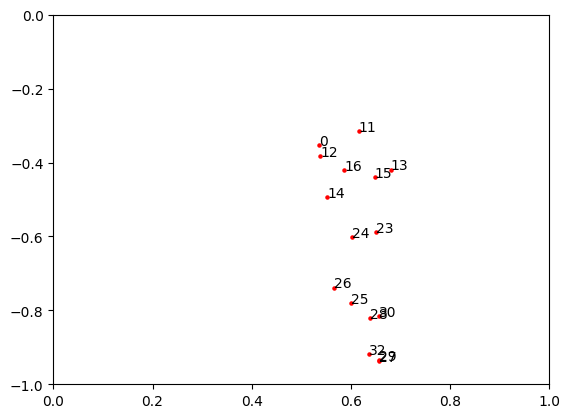

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5373761653900146, y=0.3459310233592987, z=-0.31243476271629333, visibility=0.998135507106781, presence=0.9989553689956665), NormalizedLandmark(x=0.5350520610809326, y=0.32115426659584045, z=-0.3176010251045227, visibility=0.9974209666252136, presence=0.9989355206489563), NormalizedLandmark(x=0.5380629301071167, y=0.3161381781101227, z=-0.31769609451293945, visibility=0.9975565671920776, presence=0.9990580677986145), NormalizedLandmark(x=0.5407744646072388, y=0.3104741871356964, z=-0.3177858591079712, visibility=0.9976726770401001, presence=0.9991439580917358), NormalizedLandmark(x=0.5290855169296265, y=0.3295336067676544, z=-0.300712913274765, visibility=0.996208906173706, presence=0.9986042380332947), NormalizedLandmark(x=0.5269140005111694, y=0.330820232629776, z=-0.3008127808570862, visibility=0.995788037776947, presence=0.9984683394432068), NormalizedLandmark(x=0.5263118147850037, y=0.3312457501888275, z=-0.30077093839645

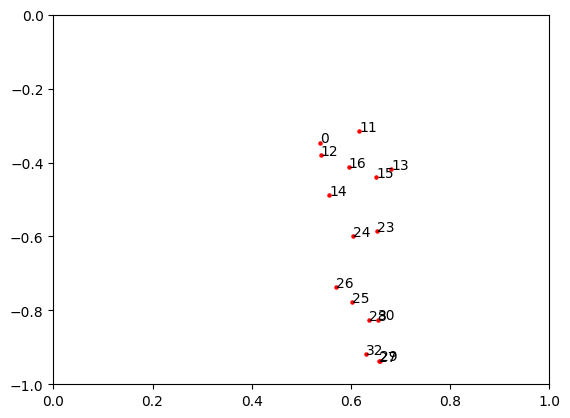

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5392419695854187, y=0.34188297390937805, z=-0.28780749440193176, visibility=0.9982879161834717, presence=0.9997420907020569), NormalizedLandmark(x=0.5365360975265503, y=0.31739309430122375, z=-0.2896364629268646, visibility=0.997622549533844, presence=0.9996678829193115), NormalizedLandmark(x=0.539327085018158, y=0.31237712502479553, z=-0.28967905044555664, visibility=0.9977371692657471, presence=0.9996964931488037), NormalizedLandmark(x=0.5419736504554749, y=0.3066279888153076, z=-0.28975212574005127, visibility=0.9978378415107727, presence=0.9997097849845886), NormalizedLandmark(x=0.5308555960655212, y=0.3255007565021515, z=-0.27372854948043823, visibility=0.9965311288833618, presence=0.9996291399002075), NormalizedLandmark(x=0.5288566946983337, y=0.3265473544597626, z=-0.273804247379303, visibility=0.9961490035057068, presence=0.9995918869972229), NormalizedLandmark(x=0.5280500054359436, y=0.32668769359588623, z=-0.2737034

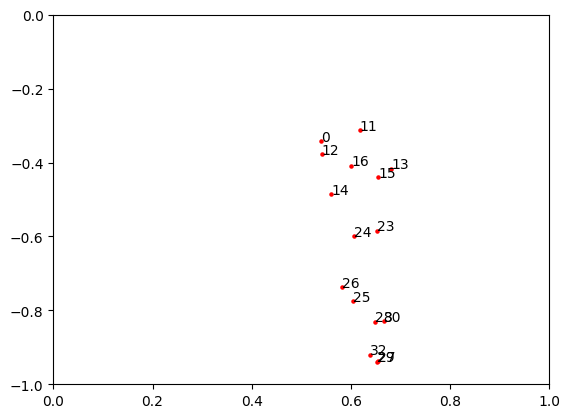

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5409324169158936, y=0.34024620056152344, z=-0.2500845789909363, visibility=0.9980728030204773, presence=0.9978088736534119), NormalizedLandmark(x=0.5379332304000854, y=0.31529757380485535, z=-0.252676397562027, visibility=0.9974504113197327, presence=0.9976710677146912), NormalizedLandmark(x=0.5406352281570435, y=0.31039074063301086, z=-0.25270187854766846, visibility=0.9975559115409851, presence=0.9979199767112732), NormalizedLandmark(x=0.5430818200111389, y=0.3048200309276581, z=-0.25280219316482544, visibility=0.9976585507392883, presence=0.9981051683425903), NormalizedLandmark(x=0.532707154750824, y=0.32255974411964417, z=-0.23527829349040985, visibility=0.9963975548744202, presence=0.9973318576812744), NormalizedLandmark(x=0.5309047698974609, y=0.32324403524398804, z=-0.23535439372062683, visibility=0.9960359334945679, presence=0.9971412420272827), NormalizedLandmark(x=0.5297345519065857, y=0.32319149374961853, z=-0.2352

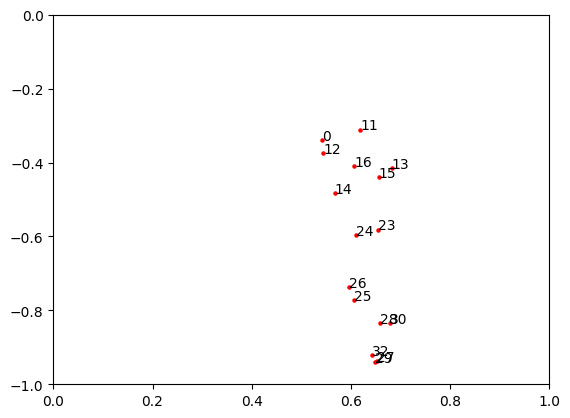

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5438143610954285, y=0.3296758532524109, z=-0.23982898890972137, visibility=0.9982047080993652, presence=0.9995998740196228), NormalizedLandmark(x=0.5414382219314575, y=0.3059231638908386, z=-0.24132440984249115, visibility=0.9976249933242798, presence=0.9995173215866089), NormalizedLandmark(x=0.544022798538208, y=0.30067840218544006, z=-0.24132682383060455, visibility=0.99771648645401, presence=0.9995549321174622), NormalizedLandmark(x=0.5468223094940186, y=0.2951088547706604, z=-0.2414247840642929, visibility=0.9978083372116089, presence=0.9995715022087097), NormalizedLandmark(x=0.536077618598938, y=0.3128664791584015, z=-0.22300677001476288, visibility=0.9966763854026794, presence=0.9994584918022156), NormalizedLandmark(x=0.5343930721282959, y=0.3134579062461853, z=-0.2230903059244156, visibility=0.9963454604148865, presence=0.9994233846664429), NormalizedLandmark(x=0.5328686237335205, y=0.3134106695652008, z=-0.22300168871

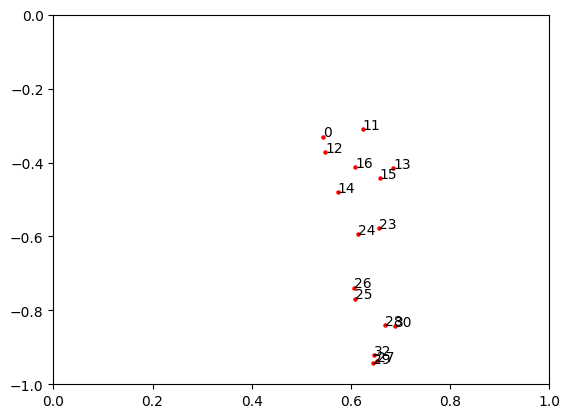

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5459926128387451, y=0.3150329887866974, z=-0.21842952072620392, visibility=0.9979240298271179, presence=0.9973558187484741), NormalizedLandmark(x=0.544335126876831, y=0.293899267911911, z=-0.22578099370002747, visibility=0.9972937107086182, presence=0.9973251819610596), NormalizedLandmark(x=0.5468006730079651, y=0.28948304057121277, z=-0.225798100233078, visibility=0.9973335862159729, presence=0.9975171089172363), NormalizedLandmark(x=0.5493224263191223, y=0.2848269045352936, z=-0.22589625418186188, visibility=0.9975136518478394, presence=0.9976823329925537), NormalizedLandmark(x=0.5400652289390564, y=0.2985646426677704, z=-0.20438458025455475, visibility=0.9963288903236389, presence=0.996955156326294), NormalizedLandmark(x=0.5390293002128601, y=0.2984449863433838, z=-0.20447233319282532, visibility=0.9959540367126465, presence=0.9969678521156311), NormalizedLandmark(x=0.5378888249397278, y=0.2975795567035675, z=-0.2044109702

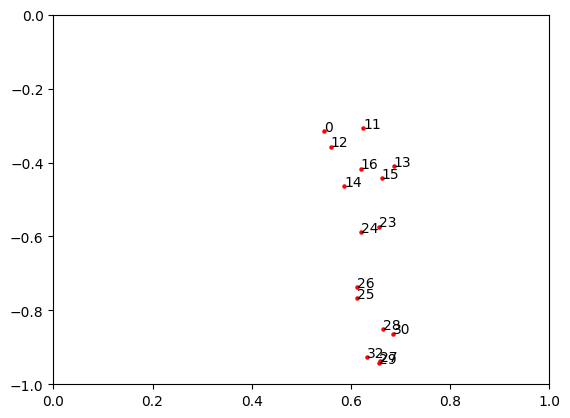

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5519425868988037, y=0.30455395579338074, z=-0.2208692580461502, visibility=0.9980436563491821, presence=0.9989399313926697), NormalizedLandmark(x=0.5506545901298523, y=0.2843693792819977, z=-0.22705745697021484, visibility=0.9974705576896667, presence=0.9991920590400696), NormalizedLandmark(x=0.55317622423172, y=0.28011542558670044, z=-0.22706182301044464, visibility=0.9975128173828125, presence=0.9993029832839966), NormalizedLandmark(x=0.5557145476341248, y=0.27563825249671936, z=-0.2271670699119568, visibility=0.9976776242256165, presence=0.9993613362312317), NormalizedLandmark(x=0.5461618304252625, y=0.2890644371509552, z=-0.20535707473754883, visibility=0.996548593044281, presence=0.9988045692443848), NormalizedLandmark(x=0.5451708436012268, y=0.2890009582042694, z=-0.20542722940444946, visibility=0.9961756467819214, presence=0.9986244440078735), NormalizedLandmark(x=0.5438447594642639, y=0.28815513849258423, z=-0.2053465

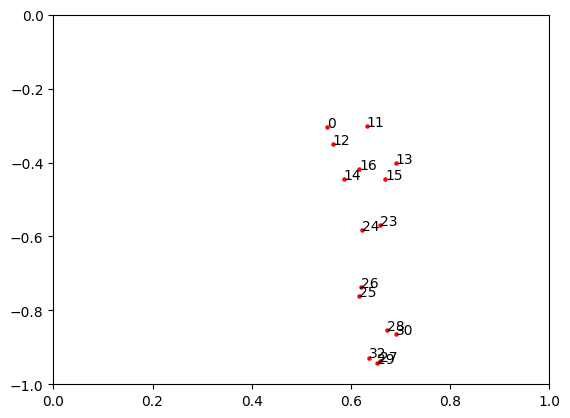

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5562508702278137, y=0.29937946796417236, z=-0.24515661597251892, visibility=0.9980905055999756, presence=0.9977691173553467), NormalizedLandmark(x=0.5552444458007812, y=0.2788861095905304, z=-0.24947912991046906, visibility=0.9975571036338806, presence=0.9984622001647949), NormalizedLandmark(x=0.5577184557914734, y=0.27413588762283325, z=-0.24947857856750488, visibility=0.9976059794425964, presence=0.9986956715583801), NormalizedLandmark(x=0.5602585077285767, y=0.2696949541568756, z=-0.24959751963615417, visibility=0.9977594614028931, presence=0.9988150596618652), NormalizedLandmark(x=0.5508342385292053, y=0.2834569811820984, z=-0.22821763157844543, visibility=0.9966505169868469, presence=0.9977377653121948), NormalizedLandmark(x=0.5499563813209534, y=0.28326839208602905, z=-0.22827628254890442, visibility=0.9962620735168457, presence=0.9974380731582642), NormalizedLandmark(x=0.5486097931861877, y=0.28227996826171875, z=-0.22

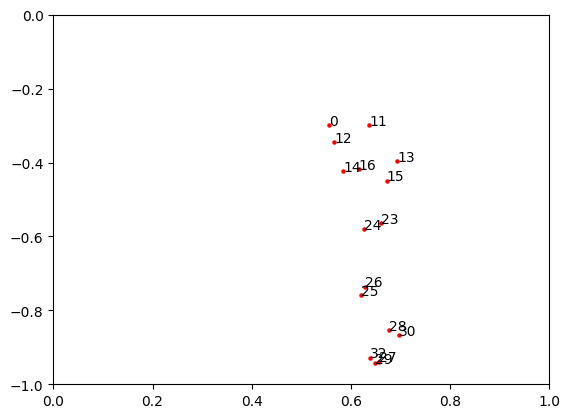

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5655244588851929, y=0.28409820795059204, z=-0.24280382692813873, visibility=0.9982069134712219, presence=0.9990009665489197), NormalizedLandmark(x=0.5647051334381104, y=0.2637849450111389, z=-0.24567779898643494, visibility=0.9977148771286011, presence=0.9991720914840698), NormalizedLandmark(x=0.5671932101249695, y=0.25921139121055603, z=-0.24567975103855133, visibility=0.9977637529373169, presence=0.9992696642875671), NormalizedLandmark(x=0.5697768330574036, y=0.2546420097351074, z=-0.24578996002674103, visibility=0.9979097843170166, presence=0.9993209838867188), NormalizedLandmark(x=0.5603114366531372, y=0.2690606713294983, z=-0.22565419971942902, visibility=0.9968752264976501, presence=0.9989123344421387), NormalizedLandmark(x=0.5595701336860657, y=0.2692297399044037, z=-0.2257172167301178, visibility=0.9965080618858337, presence=0.9988079071044922), NormalizedLandmark(x=0.5582485198974609, y=0.2685927450656891, z=-0.22565

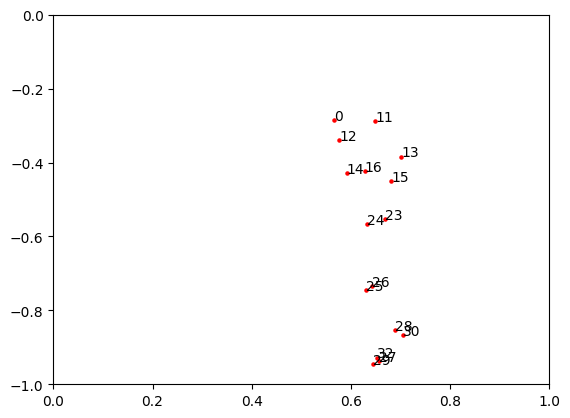

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5685173869132996, y=0.27770519256591797, z=-0.24307233095169067, visibility=0.9982354640960693, presence=0.9969411492347717), NormalizedLandmark(x=0.5679604411125183, y=0.25705334544181824, z=-0.2460104078054428, visibility=0.997743546962738, presence=0.9976012110710144), NormalizedLandmark(x=0.570532500743866, y=0.2527172565460205, z=-0.24601735174655914, visibility=0.9978033304214478, presence=0.9979044198989868), NormalizedLandmark(x=0.5731973052024841, y=0.24829092621803284, z=-0.2461254745721817, visibility=0.9979522228240967, presence=0.9980973601341248), NormalizedLandmark(x=0.5636433362960815, y=0.26232337951660156, z=-0.22614379227161407, visibility=0.996938169002533, presence=0.9968217611312866), NormalizedLandmark(x=0.5630033016204834, y=0.262502521276474, z=-0.2262125164270401, visibility=0.9965776801109314, presence=0.9965746402740479), NormalizedLandmark(x=0.5617843270301819, y=0.2619273066520691, z=-0.226160451

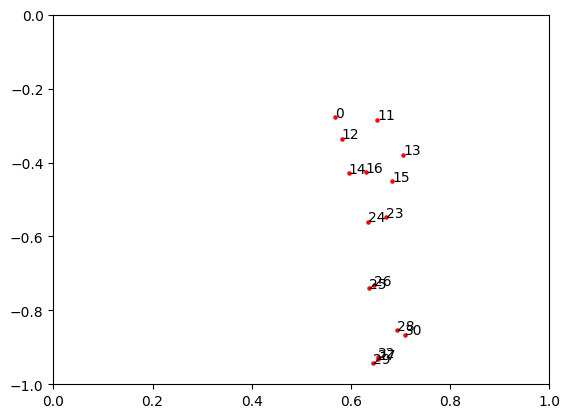

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5738251209259033, y=0.2721799314022064, z=-0.2554026246070862, visibility=0.9983167052268982, presence=0.9950549602508545), NormalizedLandmark(x=0.5733795762062073, y=0.2514451742172241, z=-0.25801384449005127, visibility=0.9978078007698059, presence=0.9954739212989807), NormalizedLandmark(x=0.5759578943252563, y=0.24719786643981934, z=-0.2580275535583496, visibility=0.9978654980659485, presence=0.9957211017608643), NormalizedLandmark(x=0.5786430835723877, y=0.24275879561901093, z=-0.25813260674476624, visibility=0.9980124235153198, presence=0.9958945512771606), NormalizedLandmark(x=0.5688524842262268, y=0.25693392753601074, z=-0.23822273313999176, visibility=0.9970754981040955, presence=0.9948136806488037), NormalizedLandmark(x=0.5681383013725281, y=0.25725823640823364, z=-0.23829135298728943, visibility=0.9967389106750488, presence=0.994714081287384), NormalizedLandmark(x=0.5667902231216431, y=0.256889671087265, z=-0.238243

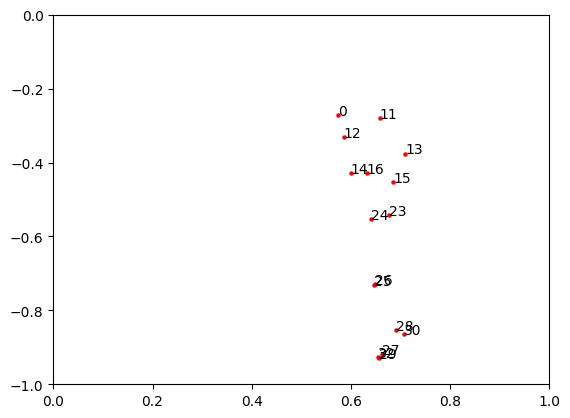

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5780451893806458, y=0.26605531573295593, z=-0.2648560106754303, visibility=0.9983216524124146, presence=0.9956811666488647), NormalizedLandmark(x=0.5777559280395508, y=0.24527399241924286, z=-0.2663881182670593, visibility=0.9977882504463196, presence=0.9959751963615417), NormalizedLandmark(x=0.5804197192192078, y=0.24097402393817902, z=-0.2664032578468323, visibility=0.9978325963020325, presence=0.9962064027786255), NormalizedLandmark(x=0.5831297039985657, y=0.23647893965244293, z=-0.2665022611618042, visibility=0.9979901313781738, presence=0.9963273406028748), NormalizedLandmark(x=0.5728782415390015, y=0.25138500332832336, z=-0.2469586282968521, visibility=0.9971233010292053, presence=0.9953880906105042), NormalizedLandmark(x=0.572047233581543, y=0.251971036195755, z=-0.24702459573745728, visibility=0.9968031048774719, presence=0.9953265190124512), NormalizedLandmark(x=0.5706489682197571, y=0.2518783509731293, z=-0.24697676

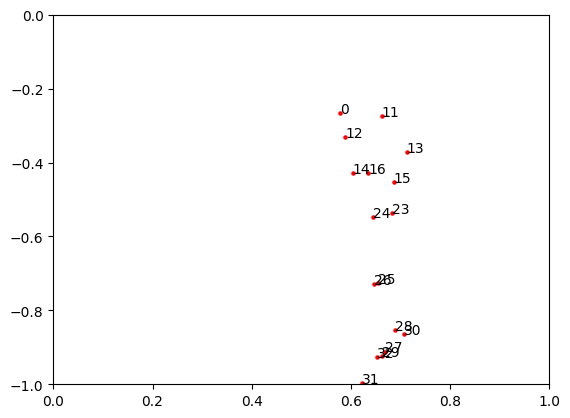

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5835139751434326, y=0.26035913825035095, z=-0.2633151412010193, visibility=0.9983647465705872, presence=0.997235119342804), NormalizedLandmark(x=0.5833415985107422, y=0.2397431880235672, z=-0.2646242380142212, visibility=0.9978406429290771, presence=0.9975724816322327), NormalizedLandmark(x=0.5860766172409058, y=0.23543305695056915, z=-0.26463642716407776, visibility=0.997882604598999, presence=0.9977007508277893), NormalizedLandmark(x=0.5889264941215515, y=0.23091036081314087, z=-0.26473268866539, visibility=0.9980385899543762, presence=0.9977729916572571), NormalizedLandmark(x=0.5783727765083313, y=0.24609841406345367, z=-0.24485844373703003, visibility=0.9972214102745056, presence=0.9970717430114746), NormalizedLandmark(x=0.5774898529052734, y=0.2468499392271042, z=-0.24492110311985016, visibility=0.9969111680984497, presence=0.9969026446342468), NormalizedLandmark(x=0.576041042804718, y=0.24697047472000122, z=-0.244872257

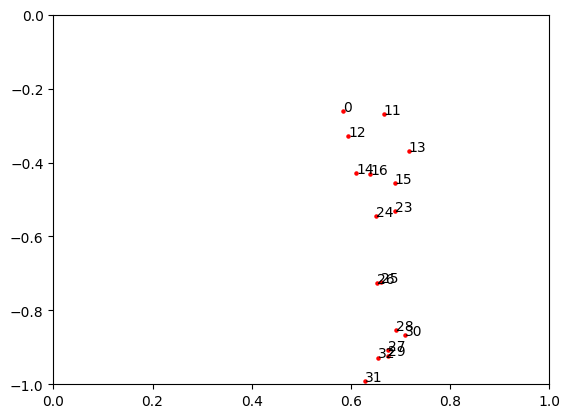

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5878718495368958, y=0.25647294521331787, z=-0.2581494450569153, visibility=0.9984308481216431, presence=0.9981375932693481), NormalizedLandmark(x=0.5876724720001221, y=0.23564641177654266, z=-0.2593185305595398, visibility=0.9979289770126343, presence=0.9983415603637695), NormalizedLandmark(x=0.5904233455657959, y=0.23126909136772156, z=-0.25932827591896057, visibility=0.9979697465896606, presence=0.9983921647071838), NormalizedLandmark(x=0.5932835340499878, y=0.22671331465244293, z=-0.25941553711891174, visibility=0.9981186985969543, presence=0.998418927192688), NormalizedLandmark(x=0.5824276208877563, y=0.24253779649734497, z=-0.23935510218143463, visibility=0.997352123260498, presence=0.9980656504631042), NormalizedLandmark(x=0.5814222693443298, y=0.24349215626716614, z=-0.23941627144813538, visibility=0.9970546364784241, presence=0.9979926347732544), NormalizedLandmark(x=0.5798785090446472, y=0.24387280642986298, z=-0.239

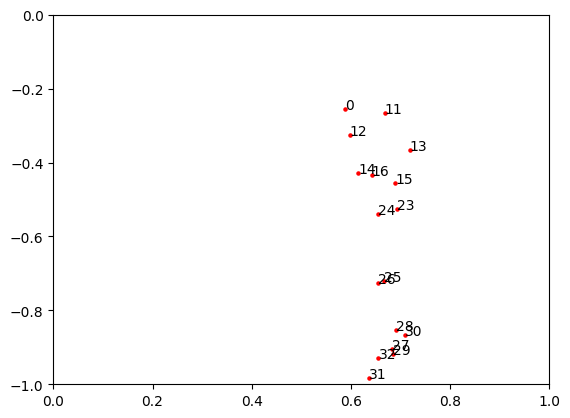

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5913900136947632, y=0.2541494369506836, z=-0.2550806999206543, visibility=0.998534083366394, presence=0.9992934465408325), NormalizedLandmark(x=0.5911363363265991, y=0.2328556776046753, z=-0.25615304708480835, visibility=0.9980617761611938, presence=0.9993322491645813), NormalizedLandmark(x=0.5939300060272217, y=0.2284717559814453, z=-0.2561572194099426, visibility=0.9981015920639038, presence=0.9993366599082947), NormalizedLandmark(x=0.5968285202980042, y=0.22389331459999084, z=-0.2562309205532074, visibility=0.9982412457466125, presence=0.999344527721405), NormalizedLandmark(x=0.5856155157089233, y=0.24008961021900177, z=-0.23577407002449036, visibility=0.9975310564041138, presence=0.999241828918457), NormalizedLandmark(x=0.584487795829773, y=0.24120938777923584, z=-0.2358386069536209, visibility=0.9972557425498962, presence=0.9992257356643677), NormalizedLandmark(x=0.5828782320022583, y=0.24179625511169434, z=-0.2357950806

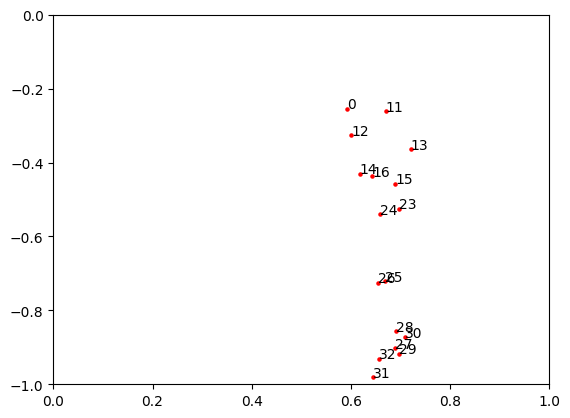

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.5944460034370422, y=0.2505704164505005, z=-0.24662628769874573, visibility=0.9986139535903931, presence=0.9990425705909729), NormalizedLandmark(x=0.5943603515625, y=0.22938567399978638, z=-0.24727119505405426, visibility=0.9981574416160583, presence=0.9990785121917725), NormalizedLandmark(x=0.5971878170967102, y=0.22505341470241547, z=-0.2472694218158722, visibility=0.9981997013092041, presence=0.9991055130958557), NormalizedLandmark(x=0.6001375913619995, y=0.22049978375434875, z=-0.2473301887512207, visibility=0.9983327984809875, presence=0.9991075396537781), NormalizedLandmark(x=0.5887810587882996, y=0.23679085075855255, z=-0.22634249925613403, visibility=0.9976588487625122, presence=0.9988433122634888), NormalizedLandmark(x=0.5876114964485168, y=0.23799116909503937, z=-0.22640439867973328, visibility=0.9973960518836975, presence=0.9987358450889587), NormalizedLandmark(x=0.5860130786895752, y=0.2386769950389862, z=-0.226353

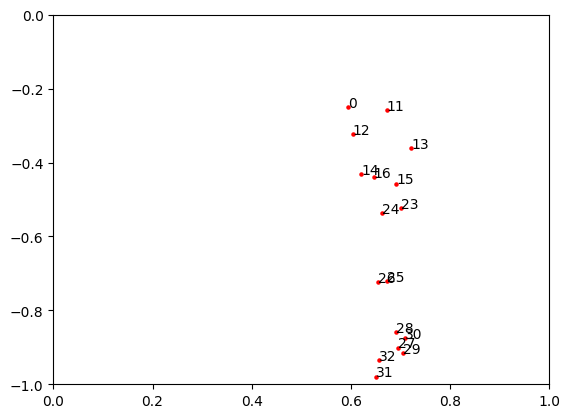

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.598318874835968, y=0.24657723307609558, z=-0.23665796220302582, visibility=0.9986954927444458, presence=0.9992102384567261), NormalizedLandmark(x=0.5983976125717163, y=0.225521981716156, z=-0.23686450719833374, visibility=0.998269259929657, presence=0.9992945194244385), NormalizedLandmark(x=0.601349949836731, y=0.22114652395248413, z=-0.23685547709465027, visibility=0.998313307762146, presence=0.9993199110031128), NormalizedLandmark(x=0.6045047044754028, y=0.21654058992862701, z=-0.23690564930438995, visibility=0.9984357953071594, presence=0.9993208646774292), NormalizedLandmark(x=0.5926740169525146, y=0.23318929970264435, z=-0.21568122506141663, visibility=0.9978009462356567, presence=0.999087929725647), NormalizedLandmark(x=0.5914545655250549, y=0.23448839783668518, z=-0.215741828083992, visibility=0.9975509643554688, presence=0.9989823698997498), NormalizedLandmark(x=0.5897954702377319, y=0.2353229522705078, z=-0.215688169

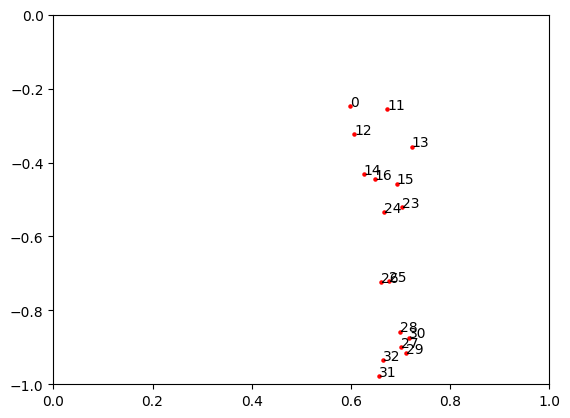

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.6039170026779175, y=0.243129163980484, z=-0.21536047756671906, visibility=0.9987594485282898, presence=0.9992332458496094), NormalizedLandmark(x=0.604178249835968, y=0.22178104519844055, z=-0.2164829820394516, visibility=0.9983628988265991, presence=0.9992819428443909), NormalizedLandmark(x=0.607320249080658, y=0.21743594110012054, z=-0.21647343039512634, visibility=0.9984046220779419, presence=0.9992809891700745), NormalizedLandmark(x=0.6107886433601379, y=0.21276989579200745, z=-0.21650268137454987, visibility=0.9985187649726868, presence=0.9992621541023254), NormalizedLandmark(x=0.5982295870780945, y=0.2293092906475067, z=-0.194645494222641, visibility=0.9979268312454224, presence=0.9991808533668518), NormalizedLandmark(x=0.5969493389129639, y=0.2306334376335144, z=-0.1946994662284851, visibility=0.9976903796195984, presence=0.9991433620452881), NormalizedLandmark(x=0.5952929258346558, y=0.23155656456947327, z=-0.194657057

KeyboardInterrupt: 

In [24]:
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode
# Creating the pose landmarker instance 

options = PoseLandmarkerOptions(base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.VIDEO)

# Key body points disreagarding the face landmarks and hand landmarks
key_body_landmark_no = [0,11,12,13,14,15,16,23,24,25,26,27,28,29,30,31,32]
landmark_dict = {
    0: "nose",
    1: "left eye (inner)",
    2: "left eye",
    3: "left eye (outer)",
    4: "right eye (inner)",
    5: "right eye",
    6: "right eye (outer)",
    7: "left ear",
    8: "right ear",
    9: "mouth (left)",
    10: "mouth (right)",
    11: "left shoulder",
    12: "right shoulder",
    13: "left elbow",
    14: "right elbow",
    15: "left wrist",
    16: "right wrist",
    17: "left pinky",
    18: "right pinky",
    19: "left index",
    20: "right index",
    21: "left thumb",
    22: "right thumb",
    23: "left hip",
    24: "right hip",
    25: "left knee",
    26: "right knee",
    27: "left ankle",
    28: "right ankle",
    29: "left heel",
    30: "right heel",
    31: "left foot index",
    32: "right foot index"
}



videoCapture = cv.VideoCapture(video_path)

output_images_folder = "outputimages"
outputpose_folder = "outputimages"


with PoseLandmarker.create_from_options(options) as landmarker:
    frame_num = 0
    timestamp_ms = 0
    while videoCapture.isOpened():
        ret, frame = videoCapture.read()
        if not ret:
            break

        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)
        shape = mp_image.numpy_view().shape

        result = landmarker.detect_for_video(mp_image, timestamp_ms= int(timestamp_ms * (1000 / fps)))

        normalised_coords = []

        filtered_landmarks = []

        print(result)

        if result.pose_landmarks:
            for i in key_body_landmark_no:
                filtered_landmarks.append(result.pose_landmarks[0][i])
                # reversing the y coord as the image is presented with the origin at the top left corner
                normalised_coords.append([result.pose_landmarks[0][i].x, -result.pose_landmarks[0][i].y])
            

        #plt.imshow(cv.cvtColor(annotated_image, cv.COLOR_RGB2BGR))
        plt.scatter(*zip(*normalised_coords), c='r', s=5)
        # labelling the points by their index

        for i, txt in enumerate(key_body_landmark_no):
            plt.annotate(txt, (normalised_coords[i][0], normalised_coords[i][1]))

        plt.axis('on')
        plt.xlim(0, 1)
        plt.ylim(-1, 0)
        plt.savefig(f"{outputpose_folder}/timestamp{frame_num}.png")

        plt.show()

        if cv.waitKey(1) & 0xFF == ord('q'):
            break

        timestamp_ms += 1/fps
        frame_num += 1


videoCapture.release()
cv.destroyAllWindows()
    